# Lab 3b: Graphs II

Lab associated with Module 3b: Graphs II

***

In [76]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/kq/6dfzrrz513q5bs2h61zv5g2r0000gn/T/ipykernel_2375/1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [77]:
import numpy as np

In [78]:
import math

In [79]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [80]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [81]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v.value) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

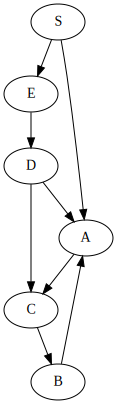

In [82]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [83]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [84]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )

Second Example

In [85]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], 3)

G.addDiEdge( V[0], V[2] , 4)

G.addDiEdge( V[2], V[1], -2)

In [86]:
print(G)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,(<__main__.Node object at 0x7fbcd654b370>, 3)) (S,(<__main__.Node object at 0x7fbcd654b970>, 4)) (B,(<__main__.Node object at 0x7fbcd654b370>, -2)) 



***

### Section 2: Dijkstra Algorithm

In [87]:
len(G.vertices)

3

In [88]:
#path tracing element
def dijkstra(w, G):
    parent = {}

    parent [w] = -1
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return 
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
                parent[v] = u
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    return parent
    # that's it!  Now each vertex holds estD which is its distance from w

In [89]:
w = G.vertices[0]
parent  = dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
A 3
B 4


***

### <font color='red'> Activity 1: Code Reflections. </font>

In [90]:
### TODO ###
### Good Luck ###

#Test 1
G1 = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G1.addVertex( Node(i) )

V = G1.vertices

#dot.edge('S', 'E')
G1.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G1.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G1.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G1.addDiEdge( V[3], V[2], 4)

#dot.edge('A', 'C')
G1.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G1.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G1.addDiEdge( V[3], V[5], 11)

#dot.edge('C', 'B')
G1.addDiEdge( V[5], V[4], 22 )

print(G1)
w = G1.vertices[0]
parent = dijkstra(w,G1)
for v in G1.vertices:
    print(v.value, v.estD)






Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,(<__main__.Node object at 0x7fbcd654b1f0>, 8)) (S,(<__main__.Node object at 0x7fbcd6498430>, 10)) (E,(<__main__.Node object at 0x7fbcd6498b20>, 1)) (A,(<__main__.Node object at 0x7fbcd6498190>, 2)) (D,(<__main__.Node object at 0x7fbcd6498430>, 4)) (D,(<__main__.Node object at 0x7fbcd6498190>, 11)) (B,(<__main__.Node object at 0x7fbcd6498430>, 1)) (C,(<__main__.Node object at 0x7fbcd6498ca0>, 22)) 

S 0
E 8
A 10
D 9
B 34
C 12


In [91]:
#path finder
def print_path(w,parent):
    if w == -1:
        return
    print_path(parent[w],parent)
    print(w, end=" ")

for v in G1.vertices:
    print_path(v,parent)
    print()

S 
S E 
S A 
S E D 
S A C B 
S A C 


### <font color='red'> Activity 2: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [92]:
#### TODO ####
### Good Luck ###
#path tracing element
def BF(w, G):
    parent = {}
    parent [w] = -1
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    has_neg_cycle = False
    for i in range (len(G.vertices)):
        for u in G.vertices:
        # update u's neighbors
            for v, wt in u.getOutNeighborsWithWeights():                
                if u.estD + wt < v.estD:
                    v.estD = u.estD + wt
                    parent[v] = u
    #negative cycle check
    for u in G.vertices:
        for v, wt in u.getOutNeighborsWithWeights():
            if u!= math.inf and u.estD + wt < v.estD:
                has_neg_cycle = True
                break

    return has_neg_cycle, parent

    




In [93]:
#graph with negativce edge
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )



### <font color='red'> Activity 3: Have a look at the following Python's implementation of heap (priority Queues): HeapDict, and try to convert our Dijkstra's implementation to use this heap data structure instead. </font>

In [94]:
import heapdict as hd

In [95]:
### TODO ###
### Good Luck ###
#path tracing element


def dijkstra_heap(w, G):
    heap = hd.heapdict()
    parent = {}
    distances = {}
    for v in G.vertices:
        v.estD = math.inf
        heap[v] = v.estD
        
    w.estD, heap[w]= 0,0
    parent[w] = -1
    while len(heap) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u,cost = heap.popitem()
        if u in distances:
            continue     
        distances[u] = cost
        for v, wt in u.getOutNeighborsWithWeights():
            if v in distances:
                continue
                print(1)
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
                parent[v] = u
                heap[v] = u.estD + wt
        
    return distances, parent
    
    # that's it!  Now each vertex holds estD which is its distance from w

print(G1)
w = G1.vertices[0]
dist, trace = dijkstra_heap(w, G1)
for v in G1.vertices:
    print_path(v,parent)
    print(dist[v], end="\n")



Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,(<__main__.Node object at 0x7fbcd654b1f0>, 8)) (S,(<__main__.Node object at 0x7fbcd6498430>, 10)) (E,(<__main__.Node object at 0x7fbcd6498b20>, 1)) (A,(<__main__.Node object at 0x7fbcd6498190>, 2)) (D,(<__main__.Node object at 0x7fbcd6498430>, 4)) (D,(<__main__.Node object at 0x7fbcd6498190>, 11)) (B,(<__main__.Node object at 0x7fbcd6498430>, 1)) (C,(<__main__.Node object at 0x7fbcd6498ca0>, 22)) 

S 0
S E 8
S A 10
S E D 9
S A C B 34
S A C 12


***

### Section 4: Dynammc Programming

We discussed Fibonacci numbers sequence as a good example of Dynamic Programming. Let us have a look at its computation.

+ recursive

In [96]:
def Fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return Fibonacci(n-1) + Fibonacci(n-2)
                

+ dynamic programming

In [97]:
def fasterFibonacci(n):
    
    F = [1 for i in range(n+1)]

    for i in range(2,n+1):
        F[i] = F[i-1] + F[i-2]
        
    return F[n]

+ recursive with memoization

In [98]:
def Fibonacci_topdown(n,F):
    
    if F[n] != None:
        return F[n]
    
    F[n] = Fibonacci_topdown(n-1, F) + Fibonacci_topdown(n-2, F)
    return F[n]

Have a look at above different ways to compute Fibonacci numbers. Report on their running time. Make sure you know the difference between them.

***

### <font color='red'> Activity 4: Write a brief report comparing 'Dynamic Programming' with 'Divide-and-Conquer' strategy? (If you are not familiar with Divide-and-Conquer strategy - revisit Quick Sort or Binary Search algorithms. You should address why we can not use DP for Quick Sort or Binary Sort). </font>

+ Divide and Conquer is dividing the problem into small sub-problem, solving each problem recursively and combine into the overall solution. It's based on the problem that could divide into sub-problems, that share the same pattern and solving techniques, which could lead to smaller and manageable tasks from the original complex problem
+ Dynamic programming is another approach to solve a problem by recursively break-down into sub-problems. However, for a DP solution, it requires the problems having certain characteristic: optimal structure as optimal solution could be constructed by optimal solution of sub-tasks, and overlapping sub-problems, as the sub-tasks result could be reused. \n Simply, DP is a recursive solution with memoirization to reduce the recursion tasks.
+ Quicksort and Binarysort are kind of problem that could be divided into sub-problems. However, these sub-tasks need to be solved individually, and the solution is concluded by combine all individual tasks instead of reused previous result from sub-tasks.

### <font color='red'> Activity 5: You are running up a staircase with a total of n steps. You can hop either 1 step, 2 steps or 3 steps at at time. Write a DP program to determine how many possible ways you can run up the stairs? (Hint: Start with a recursive solution, and then later move to top-down approach of DP). </font>

In [100]:
### TODO ###
### Good Luck ###

def solve(n):
    f = [None for i in range(n+1)]
    def count_step(n):
        if f[n] != None:
            return f[n]
        if n == 3:
            return 4
        if n == 2: 
            return 2
        if n== 1:
            return 1
        if n == 0: 
            return 0
        f[n] = count_step(n-1) + count_step(n-2) + count_step(n-3)
        return f[n]
    
    return (count_step(n))

n = 78

print(solve(4))






7


### <font color='red'> Activity 6: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

In [125]:
#### TODO ####
### Good Luck ###
### TODO ###
### Good Luck ###

#Test 1


from collections import defaultdict


G2 = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G2.addVertex( Node(i) )

V = G2.vertices

#dot.edge('S', 'E')
G2.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G2.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G2.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G2.addDiEdge( V[3], V[2], 4)

#dot.edge('A', 'C')
G2.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G2.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G2.addDiEdge( V[3], V[5], 11)

#dot.edge('C', 'B')
G2.addDiEdge( V[5], V[4], 22 )

#Floyd

print(G2)
def Floyd(G):
    D = defaultdict(dict)
    for u in G.vertices:
        for v in G.vertices:
            D[u,v] = 1e9
    for u in G.vertices:
        D[u,u] = 0
        for v,wt in u.getOutNeighborsWithWeights():
            D[u,v] = wt 

    
    for k in G.vertices:
        for u in G.vertices:
            for v,_ in u.getOutNeighborsWithWeights():
                D[u,v] = min(D[u,v],(D[u,k] + D[k,v]))
            # print(D[u,k],end=" ")
    return D

dist = Floyd(G2)

for u in G2.vertices:
    for v in G2.vertices:
        print(f"distance between {u} and {v}: ",dist[u,v])





    






Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,(<__main__.Node object at 0x7fbcd68b8d30>, 8)) (S,(<__main__.Node object at 0x7fbcd68b8fa0>, 10)) (E,(<__main__.Node object at 0x7fbcd68b8f70>, 1)) (A,(<__main__.Node object at 0x7fbcd67f0df0>, 2)) (D,(<__main__.Node object at 0x7fbcd68b8fa0>, 4)) (D,(<__main__.Node object at 0x7fbcd67f0df0>, 11)) (B,(<__main__.Node object at 0x7fbcd68b8fa0>, 1)) (C,(<__main__.Node object at 0x7fbcd68dd3d0>, 22)) 

distance between S and S:  0
distance between S and E:  8
distance between S and A:  10
distance between S and D:  1000000000.0
distance between S and B:  1000000000.0
distance between S and C:  1000000000.0
distance between E and S:  1000000000.0
distance between E and E:  0
distance between E and A:  1000000000.0
distance between E and D:  1
distance between E and B:  1000000000.0
distance between E and C:  1000000000.0
distance between A and S:  1000000000.0
distance between A and E:  1000000000.0
distance between A and A:  0
distance bet

***

***